In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
bill_train = pd.read_csv("../../pcredit/train/bill_detail_train.txt",header=None)
bill_test = pd.read_csv("../../pcredit/test/bill_detail_test.txt",header=None)
bill_data = pd.concat([bill_train,bill_test])

In [52]:
names = ["userid","time","bank_id","pre_amount_of_bill","pre_repayment","credit_amount",\
         "amount_of_bill_left","least_repayment","consume_amount","amount_of_bill","adjust_amount",\
         "circ_interest","avail_amount","prepare_amount","repayment_state"]
bill_data.columns=names
bill_data.head()

,userid,time,bank_id,pre_amount_of_bill,pre_repayment,credit_amount,amount_of_bill_left,least_repayment,consume_amount,amount_of_bill,adjust_amount,circ_interest,avail_amount,prepare_amount,repayment_state
0,3150,5906744363,6,18.626118,18.661937,20.664418,18.905766,17.847133,1,0.0,0.0,0.0,0.0,19.971271,0
1,3150,5906744401,6,18.905766,18.909954,20.664418,19.113305,17.911506,1,0.0,0.0,0.0,0.0,19.971271,0
2,3150,5906744427,6,19.113305,19.150290,20.664418,19.300194,17.977610,1,0.0,0.0,0.0,0.0,19.971271,0
3,3150,5906744515,6,19.300194,19.300280,21.000890,20.303240,18.477177,1,0.0,0.0,0.0,0.0,20.307743,0
4,3150,5906744562,6,20.303240,20.307744,21.000890,20.357134,18.510985,1,0.0,0.0,0.0,0.0,20.307743,0


In [64]:
#  选择要处理的列
columns = ['userid','credit_amount',"consume_amount","avail_amount","circ_interest","prepare_amount"]
new_bill_data = bill_data[columns]
new_bill_data.head()

,userid,credit_amount,consume_amount,avail_amount,circ_interest,prepare_amount
0,3150,20.664418,1,0.0,0.0,19.971271
1,3150,20.664418,1,0.0,0.0,19.971271
2,3150,20.664418,1,0.0,0.0,19.971271
3,3150,21.000890,1,0.0,0.0,20.307743
4,3150,21.000890,1,0.0,0.0,20.307743


In [65]:
#  new_bill_data  的透视图
new_bill_data_mean = pd.pivot_table(new_bill_data,index=["userid"],values=columns,aggfunc=np.mean)
new_bill_data_mean.head()  #  bill_detail  数据中 userid == 1 的数据没有

,avail_amount,circ_interest,consume_amount,credit_amount,prepare_amount
userid,,,,,
2,0.000000,0.0,2.521739,18.638974,7.087560
3,0.000000,0.0,2.000000,18.361833,0.000000
4,1.014342,0.0,0.055556,16.055204,7.808445
5,0.000000,0.0,0.000000,20.664418,19.971271
6,2.447743,0.0,2.904762,20.567794,13.788434


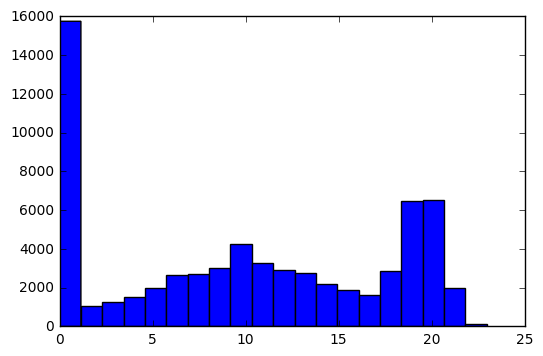

In [56]:
plt.hist(new_bill_data_mean['prepare_amount'],20)
plt.show()

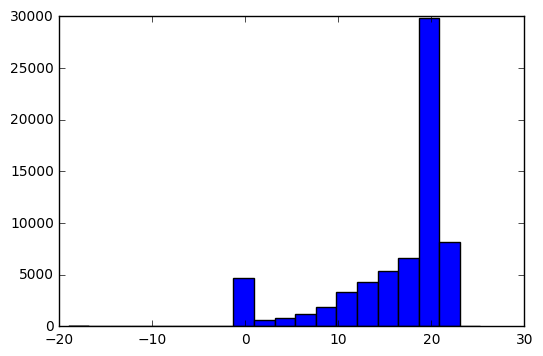

In [14]:
plt.hist(new_bill_data_mean['credit_amount'],20)
plt.show()

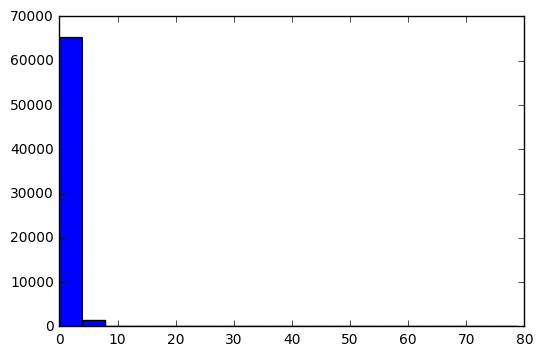

In [13]:
plt.hist(new_bill_data_mean['consume_amount'],20)
plt.show()

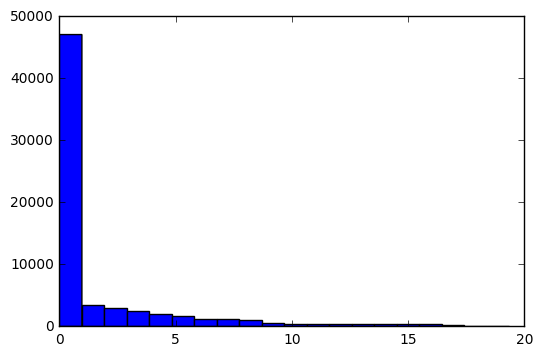

In [12]:
plt.hist(new_bill_data_mean['circ_interest'],20)
plt.show()

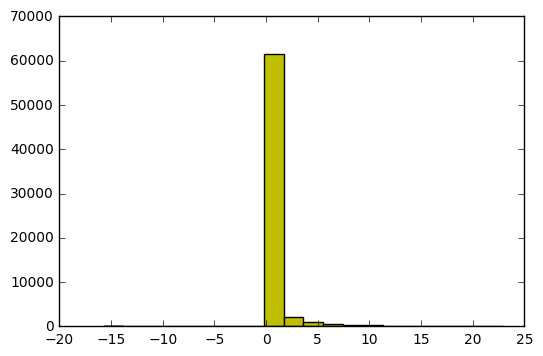

In [11]:
plt.hist(new_bill_data_mean['avail_amount'],20)
plt.show()

In [57]:
#  标签编码
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
circ_interest = new_bill_data_mean['circ_interest']
le.fit(circ_interest)

LabelEncoder()

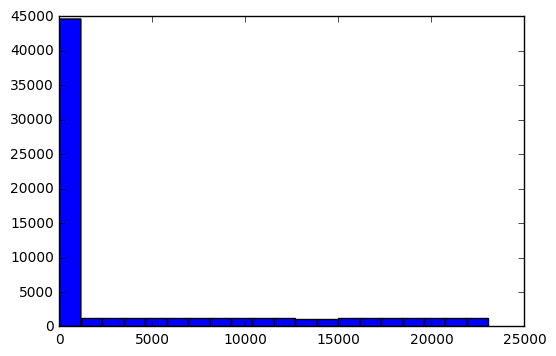

In [58]:
ledata = le.transform(circ_interest)
plt.hist(ledata,20)
plt.show()

In [59]:
new_bill_data_mean.head()

,avail_amount,circ_interest,consume_amount,credit_amount,prepare_amount
userid,,,,,
2,0.000000,0.0,2.521739,18.638974,7.087560
3,0.000000,0.0,2.000000,18.361833,0.000000
4,1.014342,0.0,0.055556,16.055204,7.808445
5,0.000000,0.0,0.000000,20.664418,19.971271
6,2.447743,0.0,2.904762,20.567794,13.788434


In [66]:
#  对 new_bill_data_mean 的所有列数据进行标签编码
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = new_bill_data_mean.columns
def transforLabel(datas,cols):
    for col in cols:
        data = datas[col]
        le.fit(data)
        datas[col] = le.transform(data)
    return datas
bill_label_data = transforLabel(new_bill_data_mean,cols)
bill_label_data.head()

,avail_amount,circ_interest,consume_amount,credit_amount,prepare_amount
userid,,,,,
2,41,0,8204,20673,6931
3,41,0,7505,19842,0
4,1839,0,215,13963,8361
5,41,0,0,35409,32408
6,4052,0,8520,34586,22107


In [43]:
s = pd.cut(bill_label_data['avail_amount'],20)
d = pd.get_dummies(s)
d.columns = ["{}#{}".format('avail_amount',i) for i in range(20)]
d.head()

,avail_amount#0,avail_amount#1,avail_amount#2,avail_amount#3,avail_amount#4,avail_amount#5,avail_amount#6,avail_amount#7,avail_amount#8,avail_amount#9,avail_amount#10,avail_amount#11,avail_amount#12,avail_amount#13,avail_amount#14,avail_amount#15,avail_amount#16,avail_amount#17,avail_amount#18,avail_amount#19
userid,,,,,,,,,,,,,,,,,,,,
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [86]:
#  构建哑变量
#print bill_label_data.head()
cols = bill_label_data.columns
def dummyData(datas,cols):
    for col in cols:
        s = pd.cut(datas[col],20)
        d = pd.get_dummies(s)
        d.columns = ["{}#{}".format(col,i) for i in range(20)]
        datas.drop(col,axis = 1,inplace = True)
        datas = datas.join(d)
    return datas
bill_dummy_data = dummyData(bill_label_data.copy(),cols)
bill_dummy_data.head()

,avail_amount#0,avail_amount#1,avail_amount#2,avail_amount#3,avail_amount#4,avail_amount#5,avail_amount#6,avail_amount#7,avail_amount#8,avail_amount#9,...,prepare_amount#10,prepare_amount#11,prepare_amount#12,prepare_amount#13,prepare_amount#14,prepare_amount#15,prepare_amount#16,prepare_amount#17,prepare_amount#18,prepare_amount#19
userid,,,,,,,,,,,,,,,,,,,,,
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [87]:
bill_dummy_data.to_csv("../data/train/bill_dummy_data.csv")